The goal of this script to to identify an efficient method to parse the hmdb xml spectra.  Turn this into an optimized program after getting basic functionality working.

Files: xml experimental_MSMS_spectra are metadata, txt files are peak lists

In [94]:
import pandas as pd
from pandas import DataFrame as df
import numpy as np
import pickle
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

In [95]:
meta_path = './HMDB0000001_ms_ms_spectrum_1_experimental.xml'
spectra_path = './HMDB0000001_msms_1_2_experimental.txt'

In [96]:
spectra_df = pd.read_csv(spectra_path, sep='\t', header=None)
spectra_df.columns = ['mz', 'i']

In [97]:
spectra_df.head(5)

,mz,i
0,50.22,214.1747
1,50.76,180.9845
2,50.94,217.2800
3,51.00,193.8255
4,51.12,222.1745


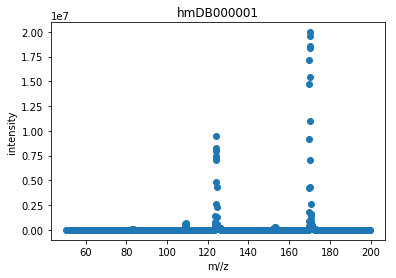

In [98]:
x = spectra_df.mz
y = spectra_df.i
plt.scatter(x, y)
plt.title('hmDB000001')
plt.xlabel('m//z')
plt.ylabel('intensity')
plt.show()

In [99]:
norm_df = spectra_df.copy(deep=True)

In [100]:
norm_df['i'] = norm_df['i'] / norm_df['i'].max()

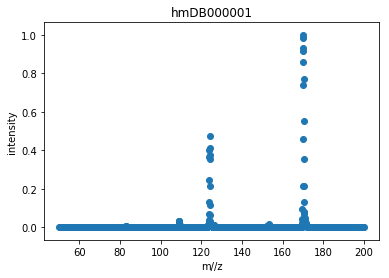

In [101]:
x = norm_df.mz
y = norm_df.i
plt.scatter(x, y)
plt.title('hmDB000001')
plt.xlabel('m//z')
plt.ylabel('intensity')
plt.show()

In [102]:
tree = ET.parse(meta_path)
root = tree.getroot()

In [103]:
root.tag

'ms-ms'

In [110]:
root.notes

AttributeError: 'xml.etree.ElementTree.Element' object has no attribute 'notes'

In [117]:
[elem.tag for elem in root.iter()]

['ms-ms',
 'id',
 'notes',
 'sample-concentration',
 'solvent',
 'sample-mass',
 'sample-assessment',
 'spectra-assessment',
 'sample-source',
 'collection-date',
 'instrument-type',
 'peak-counter',
 'created-at',
 'updated-at',
 'mono-mass',
 'energy-field',
 'collision-energy-level',
 'collision-energy-voltage',
 'ionization-mode',
 'sample-concentration-units',
 'sample-mass-units',
 'predicted',
 'structure-id',
 'splash-key',
 'database-id',
 'references',
 'reference',
 'id',
 'spectra-id',
 'spectra-type',
 'pubmed-id',
 'ref-text',
 'database',
 'database-id',
 'ms-ms-peaks',
 'ms-ms-peak',
 'id',
 'ms-ms-id',
 'mass-charge',
 'intensity',
 'molecule-id',
 'ms-ms-peak',
 'id',
 'ms-ms-id',
 'mass-charge',
 'intensity',
 'molecule-id',
 'ms-ms-peak',
 'id',
 'ms-ms-id',
 'mass-charge',
 'intensity',
 'molecule-id',
 'ms-ms-peak',
 'id',
 'ms-ms-id',
 'mass-charge',
 'intensity',
 'molecule-id',
 'ms-ms-peak',
 'id',
 'ms-ms-id',
 'mass-charge',
 'intensity',
 'molecule-id']

In [120]:
[elem.text for elem in root.iter()]

['\n  ',
 '1',
 'delivery=LC\nanalyzer=Triple_Quad',
 None,
 None,
 '1.0',
 'Excellent',
 'Excellent',
 None,
 '2007-01-29',
 'Quattro_QQQ',
 '1610',
 '2012-07-24T19:14:19Z',
 '2016-05-12T04:26:04Z',
 None,
 None,
 'low',
 '10',
 'Positive',
 None,
 'mg',
 'false',
 '8997',
 'splash10-00di-0900000000-037d24a7d65676b7e356',
 'HMDB0000001',
 '\n    ',
 '\n      ',
 '1',
 '1',
 'MsMs',
 '18953024',
 'Wishart DS, Knox C, Guo AC, Eisner R, Young N, Gautam B, Hau DD, Psychogios N, Dong E, Bouatra S, Mandal R, Sinelnikov I, Xia J, Jia L, Cruz JA, Lim E, Sobsey CA, Shrivastava S, Huang P, Liu P, Fang L, Peng J, Fradette R, Cheng D, Tzur D, Clements M, Lewis A, De Souza A, Zuniga A, Dawe M, Xiong Y, Clive D, Greiner R, Nazyrova A, Shaykhutdinov R, Li L, Vogel HJ, Forsythe I: HMDB: a knowledgebase for the human metabolome. Nucleic Acids Res. 2009 Jan;37(Database issue):D603-10. doi: 10.1093/nar/gkn810. Epub 2008 Oct 25.',
 'HMDB',
 'HMDB00001',
 '\n    ',
 '\n      ',
 '579',
 '1',
 '109.2',
 '3

In [119]:
print(ET.tostring(root, encoding='utf8').decode('utf8'))

<?xml version='1.0' encoding='utf8'?>
<ms-ms>
  <id>1</id>
  <notes>delivery=LC
analyzer=Triple_Quad</notes>
  <sample-concentration nil="true" />
  <solvent nil="true" />
  <sample-mass>1.0</sample-mass>
  <sample-assessment>Excellent</sample-assessment>
  <spectra-assessment>Excellent</spectra-assessment>
  <sample-source nil="true" />
  <collection-date>2007-01-29</collection-date>
  <instrument-type>Quattro_QQQ</instrument-type>
  <peak-counter>1610</peak-counter>
  <created-at>2012-07-24T19:14:19Z</created-at>
  <updated-at>2016-05-12T04:26:04Z</updated-at>
  <mono-mass nil="true" />
  <energy-field nil="true" />
  <collision-energy-level>low</collision-energy-level>
  <collision-energy-voltage>10</collision-energy-voltage>
  <ionization-mode>Positive</ionization-mode>
  <sample-concentration-units nil="true" />
  <sample-mass-units>mg</sample-mass-units>
  <predicted>false</predicted>
  <structure-id>8997</structure-id>
  <splash-key>splash10-00di-0900000000-037d24a7d65676b7e356<

In [125]:
meta_dict = {}
for elem in root.iter():
    meta_dict[elem.tag] = elem.text

In [126]:
meta_dict

{'ms-ms': '\n  ',
 'id': '1331',
 'notes': 'delivery=LC\nanalyzer=Triple_Quad',
 'sample-concentration': None,
 'solvent': None,
 'sample-mass': '1.0',
 'sample-assessment': 'Excellent',
 'spectra-assessment': 'Excellent',
 'sample-source': None,
 'collection-date': '2007-01-29',
 'instrument-type': 'Quattro_QQQ',
 'peak-counter': '1610',
 'created-at': '2012-07-24T19:14:19Z',
 'updated-at': '2016-05-12T04:26:04Z',
 'mono-mass': None,
 'energy-field': None,
 'collision-energy-level': 'low',
 'collision-energy-voltage': '10',
 'ionization-mode': 'Positive',
 'sample-concentration-units': None,
 'sample-mass-units': 'mg',
 'predicted': 'false',
 'structure-id': '8997',
 'splash-key': 'splash10-00di-0900000000-037d24a7d65676b7e356',
 'database-id': 'HMDB00001',
 'references': '\n    ',
 'reference': '\n      ',
 'spectra-id': '1',
 'spectra-type': 'MsMs',
 'pubmed-id': '18953024',
 'ref-text': 'Wishart DS, Knox C, Guo AC, Eisner R, Young N, Gautam B, Hau DD, Psychogios N, Dong E, Bouatra 

In [127]:
meta_dict['file_name'] = meta_path

1. Okay, so I can parse the spectra and spectra metadata.  
2. Make two dictionaries with the unique hmdb ID's as keys for each.  3. Have a list in each and append spectra or spectra meta at the same hmdb ID as read in.
4. Can access the pickle of all of hmdb metadata by hmdb ID.  Chemical formula can be pulled and then exact mass and exact mass+adducts can be be calculated.